# Ensemble Learning

## Weighted Mean Ensemble

In [8]:
from models.ensemble_weighted_mean import EnsembleWeightedMean

ensemble_direct_optimization = EnsembleWeightedMean(optimization=True)
ensemble_direct_optimization_with_features = EnsembleWeightedMean(optimization=True, with_features=True)
ensemble_weigthed_mean = EnsembleWeightedMean(optimization=False)

data = 'ensemble-pd-hek293t-pe2.csv'

ensemble_direct_optimization.fit(data)
direct_optimization_performance = ensemble_direct_optimization.test(data) 

ensemble_weigthed_mean.fit(data)
weighted_mean_performance = ensemble_weigthed_mean.test(data)

ensemble_direct_optimization_with_features.fit(data)
with_features_performance = ensemble_direct_optimization_with_features.test(data)

/home/peiheng/development/ox-dissertation/models/ensemble_weighted_mean.py:189: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  predictions = torch.tensor(predictions, dtype=torch.float32).T


Pearson


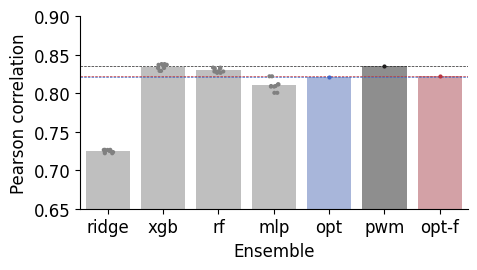

opt vs ridge t-statistic: 50.99729396868088, p-value: 2.1518343993309913e-12
Significant
opt vs xgb t-statistic: -3.8323470974082143, p-value: 0.004013271041194074
Significant
opt vs rf t-statistic: -3.1525394483462965, p-value: 0.011689682680398904
Significant
opt vs mlp t-statistic: 1.3651849964661502, p-value: 0.20534355879668034
Not significant
pwm vs ridge t-statistic: 58.700523723548926, p-value: 6.087774182245172e-13
Significant
pwm vs xgb t-statistic: 0.26187926127032024, p-value: 0.799309583419286
Not significant
pwm vs rf t-statistic: 1.9685221504522117, p-value: 0.08053332942055727
Not significant
pwm vs mlp t-statistic: 3.2730488675391607, p-value: 0.009635664290168334
Significant
opt-f vs ridge t-statistic: 51.60377227427601, p-value: 1.935277146736258e-12
Significant
opt-f vs xgb t-statistic: -3.510007047357765, p-value: 0.00661854919499981
Significant
opt-f vs rf t-statistic: -2.74935625634493, p-value: 0.022500495965001
Significant
opt-f vs mlp t-statistic: 1.5153918687

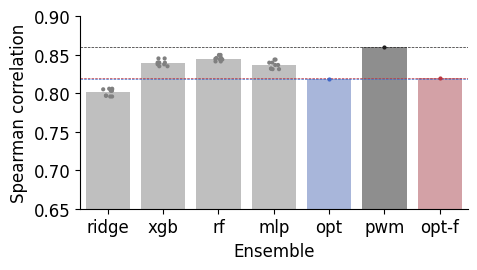

opt vs ridge t-statistic: 3.640872317212434, p-value: 0.005393561071320172
Significant
opt vs xgb t-statistic: -5.659031207664644, p-value: 0.0003100172966529837
Significant
opt vs rf t-statistic: -8.685354253009661, p-value: 1.141235973404293e-05
Significant
opt vs mlp t-statistic: -3.514841359746347, p-value: 0.006568457025129761
Significant
pwm vs ridge t-statistic: 12.548634642392162, p-value: 5.256732062787184e-07
Significant
pwm vs xgb t-statistic: 5.595443756422363, p-value: 0.00033622857436508316
Significant
pwm vs rf t-statistic: 4.932423983895909, p-value: 0.0008106344143909329
Significant
pwm vs mlp t-statistic: 4.543257096418127, p-value: 0.0013993741658809037
Significant
opt-f vs ridge t-statistic: 3.998330238113777, p-value: 0.0031182743072015215
Significant
opt-f vs xgb t-statistic: -5.20740249613887, p-value: 0.000558506924399768
Significant
opt-f vs rf t-statistic: -8.13888898842801, p-value: 1.9285946949590365e-05
Significant
opt-f vs mlp t-statistic: -3.1914794406236

In [9]:
import numpy as np
import pandas as pd
from os.path import join as pjoin

direct_op_pearson, direct_op_spearman = direct_optimization_performance
performance_weighted_pearson, performance_weighted_spearman = weighted_mean_performance
performance_with_features_pearson, performance_with_features_spearman = with_features_performance

# join the performance values, ignore the common keys
direct_op_pearson.update(performance_weighted_pearson)
direct_op_spearman.update(performance_weighted_spearman)

direct_op_pearson.update(performance_with_features_pearson)
direct_op_spearman.update(performance_with_features_spearman)

performance_pearson = direct_op_pearson
performance_spearman = direct_op_spearman

# plot the performance as bar plot
import matplotlib.pyplot as plt
import seaborn as sns

alpha = 0.5
f_size = 12
# plot the bar plot on top of the strip plot
# bar plot should be shortened to emphasize the difference in values
for name, performance in zip(['Pearson', 'Spearman'], [performance_pearson, performance_spearman]):
    # performance = pd.DataFrame({'Models': list(performance.keys()), 'Performance': list(performance.values()), 'Category': [0 if 'op' in model or 'pwm' in model else 1 for model in performance.keys()]})
    # print(performance)
    # add a category column
    print(name)
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_ylim(0.65, 0.9)
    colour_palette = iter(sns.color_palette('icefire', n_colors=3))
    colours = ['gray' if not ('opt' in model or 'pwm' in model) else next(colour_palette) for model in performance.keys()]
    sns.stripplot(data=performance, ax=ax, alpha=1, jitter=0.1, size=3, palette=colours)
    sns.barplot(data=performance, ax=ax, alpha=alpha, palette=colours, errorbar=None)
    ax.set_xlabel('Ensemble', fontsize=f_size)
    ax.set_ylabel(f'{name} correlation', fontsize=f_size)
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax.tick_params(axis='both', which='minor', labelsize=f_size)
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # show a horizontal line at the mean for 'opt', 'pwm' models of matching color
    for ind, model in enumerate(performance.keys()):
        if 'opt' in model or 'pwm' in model:
            ax.axhline(y=performance[model], color=colours[ind], linestyle='--', linewidth=0.5)
    # rotate the x tick labels
    plt.show()
    
    # perform paired t-test between opt pwm models and the rest
    from scipy.stats import ttest_ind
    adaboost_values = {model: performance[model] for model in performance.keys() if 'opt' in model or 'pwm' in model}
    rest_values = {model: performance[model] for model in performance.keys() if not ('opt' in model or 'pwm' in model)}

    for ensemble, performance_ensemble in zip(adaboost_values.keys(), adaboost_values.values()):
        for rest, performance_rest in zip(rest_values.keys(), rest_values.values()):
            t_stat, p_value = ttest_ind(performance_ensemble, performance_rest)
            print(f'{ensemble} vs {rest} t-statistic: {t_stat}, p-value: {p_value}')
            if p_value < 0.05:
                print('Significant')
            else:
                print('Not significant')
                
    # save the figure
    fig.savefig(pjoin('dissertation', 'figures', f'ensemble_{name.lower()}.pdf'), bbox_inches='tight')

## Bagging



In [5]:
from models.ensemble_bagging import EnsembleBagging

data = 'ensemble-pd-hek293t-pe2.csv'

n_rounds = [1, 2, 3, 5, 10, 15]

performances_pearson = {}
performances_spearman = {}
for i in n_rounds:
    print(f'Bagging with {i} rounds')
    ensemble_bagging = EnsembleBagging(n_rounds=i)
    ensemble_bagging.fit(data)
    performance_pearson, performance_spearman = ensemble_bagging.test(data)
    performance_pearson[f'bag-{i}'] = performance_pearson.pop('bag')
    performance_spearman[f'bag-{i}'] = performance_spearman.pop('bag')
    performances_pearson.update(performance_pearson)
    performances_spearman.update(performance_spearman)

Bagging with 1 rounds
Bagging with 2 rounds
Bagging with 3 rounds
Bagging with 5 rounds
Bagging with 10 rounds
Bagging with 15 rounds


/tmp/ipykernel_4025/3526034384.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right')


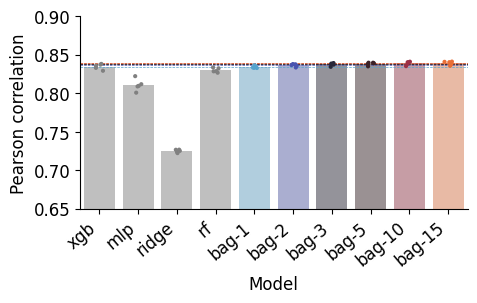

bag-1 vs xgb t-statistic: -0.2591460403311577, p-value: 0.802066154521248
Not significant
bag-1 vs mlp t-statistic: 6.700561941791916, p-value: 0.00015261767466254116
Significant
bag-1 vs ridge t-statistic: 99.37287916762953, p-value: 1.1743807896277172e-13
Significant
bag-1 vs rf t-statistic: 2.8799278648481503, p-value: 0.020513809275275262
Significant
bag-2 vs xgb t-statistic: 0.9268371023302641, p-value: 0.3811222454407356
Not significant
bag-2 vs mlp t-statistic: 7.257818759886422, p-value: 8.738748566396718e-05
Significant
bag-2 vs ridge t-statistic: 95.49988339132881, p-value: 1.6137061769924707e-13
Significant
bag-2 vs rf t-statistic: 4.182442424468287, p-value: 0.0030693381614509403
Significant
bag-3 vs xgb t-statistic: 1.5336865347065722, p-value: 0.1636497890555931
Not significant
bag-3 vs mlp t-statistic: 7.5515184461322855, p-value: 6.598770968282248e-05
Significant
bag-3 vs ridge t-statistic: 93.85974434418623, p-value: 1.853377773234497e-13
Significant
bag-3 vs rf t-stat

/tmp/ipykernel_4025/3526034384.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right')


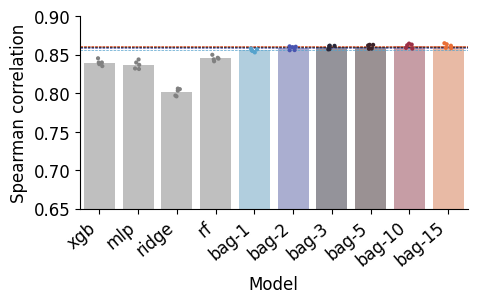

bag-1 vs xgb t-statistic: 8.524593967242835, p-value: 2.7567476363333754e-05
Significant
bag-1 vs mlp t-statistic: 7.557423077513316, p-value: 6.562187315323936e-05
Significant
bag-1 vs ridge t-statistic: 23.64494856740184, p-value: 1.0891688037509003e-08
Significant
bag-1 vs rf t-statistic: 6.398941173052546, p-value: 0.00020936881357383285
Significant
bag-2 vs xgb t-statistic: 9.433277145081814, p-value: 1.3098643000487233e-05
Significant
bag-2 vs mlp t-statistic: 8.387475335973042, p-value: 3.1018784433987344e-05
Significant
bag-2 vs ridge t-statistic: 23.853387623483755, p-value: 1.0162149498419609e-08
Significant
bag-2 vs rf t-statistic: 7.509647816689398, p-value: 6.864778490287218e-05
Significant
bag-3 vs xgb t-statistic: 10.047344182192232, p-value: 8.193983292011884e-06
Significant
bag-3 vs mlp t-statistic: 8.85875636327991, p-value: 2.081341188066927e-05
Significant
bag-3 vs ridge t-statistic: 24.386351754469846, p-value: 8.533930603447563e-09
Significant
bag-3 vs rf t-statis

In [9]:
import  numpy as np
import pandas as pd
from os.path import join as pjoin
from scipy.stats import ttest_ind

# plot the performance as bar plot
import matplotlib.pyplot as plt
import seaborn as sns

alpha = 0.5
f_size = 12

for name, performance in zip(['Pearson', 'Spearman'], [performances_pearson, performances_spearman]):
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_ylim(0.65, 0.9)
    colour_palette = iter(sns.color_palette('icefire', n_colors=len(n_rounds)))
    colours = ['gray' if 'bag' not in model else next(colour_palette) for model in performance.keys()]
    sns.stripplot(data=performance, ax=ax, alpha=1, jitter=0.1, size=3, palette=colours)
    sns.barplot(data=performance, ax=ax, alpha=alpha, palette=colours, errorbar=None)
    ax.set_xlabel('Model', fontsize=f_size)
    ax.set_ylabel(f'{name} correlation', fontsize=f_size)
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax.tick_params(axis='both', which='minor', labelsize=f_size)
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # show a horizontal line at the mean for adaboost model
    for ind, model in enumerate(performance.keys()):
        if 'bag' in model:
            ax.axhline(y=np.mean(performance[model]), color=colours[ind], linestyle='--', linewidth=0.5)
    # rotate the x tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
    plt.show()

    # save the figure
    fig.savefig(pjoin('dissertation', 'figures', f'ensemble_bagging_{name.lower()}_round.png'), bbox_inches='tight', dpi=300)
    
    # perform paired t-test between opt pwm models and the rest
    from scipy.stats import ttest_ind
    adaboost_values = {model: performance[model] for model in performance.keys() if 'bag' in model}
    rest_values = {model: performance[model] for model in performance.keys() if 'bag' not in model}

    for ensemble, performance_ensemble in zip(adaboost_values.keys(), adaboost_values.values()):
        for rest, performance_rest in zip(rest_values.keys(), rest_values.values()):
            t_stat, p_value = ttest_ind(performance_ensemble, performance_rest)
            print(f'{ensemble} vs {rest} t-statistic: {t_stat}, p-value: {p_value}')
            if p_value < 0.05:
                print('Significant')
            else:
                print('Not significant')

In [1]:
from models.ensemble_bagging import EnsembleBagging

data = 'ensemble-pd-hek293t-pe2.csv'

percentages = [0.3, 0.5, 0.7, 0.9]

performances_pearson = {}
performances_spearman = {}
for i in percentages:
    ensemble_bagging = EnsembleBagging(n_rounds=3, sample_percentage=i)
    ensemble_bagging.fit(data)
    performance_pearson, performance_spearman = ensemble_bagging.test(data)
    performance_pearson[f'bag-{i}'] = performance_pearson.pop('bag')
    performance_spearman[f'bag-{i}'] = performance_spearman.pop('bag')
    performances_pearson.update(performance_pearson)
    performances_spearman.update(performance_spearman)

/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:52:31] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


/tmp/ipykernel_4025/976023103.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right')


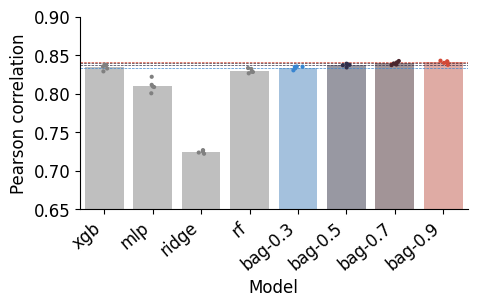

bag-0.3 vs xgb t-statistic: -0.3473412222123575, p-value: 0.7372959995198055
Not significant
bag-0.3 vs mlp t-statistic: 6.534331727767879, p-value: 0.00018143208975556876
Significant
bag-0.3 vs ridge t-statistic: 85.41386261320456, p-value: 3.9380172859558447e-13
Significant
bag-0.3 vs rf t-statistic: 2.5089435043838693, p-value: 0.03643084388449079
Significant
bag-0.5 vs xgb t-statistic: 1.5336865347065722, p-value: 0.1636497890555931
Not significant
bag-0.5 vs mlp t-statistic: 7.5515184461322855, p-value: 6.598770968282248e-05
Significant
bag-0.5 vs ridge t-statistic: 93.85974434418623, p-value: 1.853377773234497e-13
Significant
bag-0.5 vs rf t-statistic: 4.843409573711926, p-value: 0.0012825549814173406
Significant
bag-0.7 vs xgb t-statistic: 2.720772893615622, p-value: 0.026217349630594175
Significant
bag-0.7 vs mlp t-statistic: 8.132686008264287, p-value: 3.8784411248783874e-05
Significant
bag-0.7 vs ridge t-statistic: 89.04815715855153, p-value: 2.822552112300688e-13
Significant

/tmp/ipykernel_4025/976023103.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right')


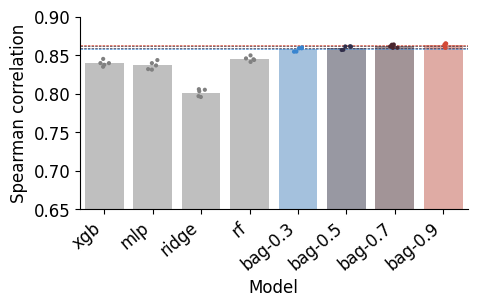

bag-0.3 vs xgb t-statistic: 8.781976431387404, p-value: 2.2184259706273613e-05
Significant
bag-0.3 vs mlp t-statistic: 7.92764535538344, p-value: 4.6616903012937316e-05
Significant
bag-0.3 vs ridge t-statistic: 23.105763214614086, p-value: 1.3067675295761059e-08
Significant
bag-0.3 vs rf t-statistic: 6.799368355659197, p-value: 0.00013791201204558853
Significant
bag-0.5 vs xgb t-statistic: 10.047344182192232, p-value: 8.193983292011884e-06
Significant
bag-0.5 vs mlp t-statistic: 8.85875636327991, p-value: 2.081341188066927e-05
Significant
bag-0.5 vs ridge t-statistic: 24.386351754469846, p-value: 8.533930603447563e-09
Significant
bag-0.5 vs rf t-statistic: 8.203892983753496, p-value: 3.64161084497051e-05
Significant
bag-0.7 vs xgb t-statistic: 11.542749288573438, p-value: 2.880931543489077e-06
Significant
bag-0.7 vs mlp t-statistic: 9.886401469422903, p-value: 9.243378949606935e-06
Significant
bag-0.7 vs ridge t-statistic: 26.006529530236502, p-value: 5.130649298024588e-09
Significant


In [4]:
import  numpy as np
import pandas as pd
from os.path import join as pjoin
from scipy.stats import ttest_ind

# plot the performance as bar plot
import matplotlib.pyplot as plt
import seaborn as sns

alpha = 0.5
f_size = 12

for name, performance in zip(['Pearson', 'Spearman'], [performances_pearson, performances_spearman]):
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_ylim(0.65, 0.9)
    colour_palette = iter(sns.color_palette('icefire', n_colors=len(percentages)))
    colours = ['gray' if 'bag' not in model else next(colour_palette) for model in performance.keys()]
    sns.stripplot(data=performance, ax=ax, alpha=1, jitter=0.1, size=3, palette=colours)
    sns.barplot(data=performance, ax=ax, alpha=alpha, palette=colours, errorbar=None)
    ax.set_xlabel('Model', fontsize=f_size)
    ax.set_ylabel(f'{name} correlation', fontsize=f_size)
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax.tick_params(axis='both', which='minor', labelsize=f_size)
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # show a horizontal line at the mean for adaboost model
    for ind, model in enumerate(performance.keys()):
        if 'bag' in model:
            ax.axhline(y=np.mean(performance[model]), color=colours[ind], linestyle='--', linewidth=0.5)
    # rotate the x tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
    plt.show()

    # save the figure
    fig.savefig(pjoin('dissertation', 'figures', f'ensemble_{name.lower()}_bagging_percentage.pdf'), bbox_inches='tight', dpi=300)
    
    # perform paired t-test between opt pwm models and the rest
    from scipy.stats import ttest_ind
    adaboost_values = {model: performance[model] for model in performance.keys() if 'bag' in model}
    rest_values = {model: performance[model] for model in performance.keys() if 'bag' not in model}

    for ensemble, performance_ensemble in zip(adaboost_values.keys(), adaboost_values.values()):
        for rest, performance_rest in zip(rest_values.keys(), rest_values.values()):
            t_stat, p_value = ttest_ind(performance_ensemble, performance_rest)
            print(f'{ensemble} vs {rest} t-statistic: {t_stat}, p-value: {p_value}')
            if p_value < 0.05:
                print('Significant')
            else:
                print('Not significant')

## AdaBoost Ensemble

In [1]:
from models.ensemble_adaboost import EnsembleAdaBoost

data = 'ensemble-pd-hek293t-pe2.csv'

ensemble_adaboost_performances_pearson = {}
ensemble_adaboost_performances_spearman = {}

rounds = 10

for round in range(rounds):  
    ensemble_adaboost = EnsembleAdaBoost(n_rounds=round+1)
    ensemble_adaboost.fit(data)
    ensemble_adaboost_performance_pearson, ensemble_adaboost_performance_spearman = ensemble_adaboost.test(data)
    # rename the keys to include the round number
    ensemble_adaboost_performance_pearson[f'ada-{round+1}'] = ensemble_adaboost_performance_pearson.pop('ada')
    ensemble_adaboost_performance_spearman[f'ada-{round+1}'] = ensemble_adaboost_performance_spearman.pop('ada')

    ensemble_adaboost_performances_pearson.update(ensemble_adaboost_performance_pearson)
    ensemble_adaboost_performances_spearman.update(ensemble_adaboost_performance_spearman)

Round 1 xgb 0.9287071577778316


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.7468430734514941
Round 1 ridge 0.7255434744059011
Round 1 rf 0.8947669134423777
Round 1 xgb 0.9301076653782875


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8113619444766856
Round 1 ridge 0.7240557303908561
Round 1 rf 0.8973620575498851
Round 1 xgb 0.9316336484556391


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8095451530227404
Round 1 ridge 0.724745887451338
Round 1 rf 0.8971604019354588
Round 1 xgb 0.9307239967282566


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.7787456676881004
Round 1 ridge 0.7247630188777682
Round 1 rf 0.8950161924014003
Round 1 xgb 0.9281359644548639


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8140581940301413
Round 1 ridge 0.7243527350546091
Round 1 rf 0.8969190526777342


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:46:32] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use r

Round 1 xgb 0.9287071577778316


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.7468430734514941
Round 1 ridge 0.7255434744059011
Round 1 rf 0.8947669134423777
Round 2 xgb 0.9165556509563432


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7937741999170973
Round 2 ridge 0.7251102165754519
Round 2 rf 0.898353403625409
Round 1 xgb 0.9301076653782875


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8113619444766856
Round 1 ridge 0.7240557303908561
Round 1 rf 0.8973620575498851
Round 2 xgb 0.9171086246880711


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7720097630733229
Round 2 ridge 0.7239206938125489
Round 2 rf 0.8992829395838725
Round 1 xgb 0.9316336484556391


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8095451530227404
Round 1 ridge 0.724745887451338
Round 1 rf 0.8971604019354588
Round 2 xgb 0.9156806438081673


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7804464549787652
Round 2 ridge 0.7249879941680244
Round 2 rf 0.9010562709197264
Round 1 xgb 0.9307239967282566


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.7787456676881004
Round 1 ridge 0.7247630188777682
Round 1 rf 0.8950161924014003
Round 2 xgb 0.9204280878749608


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7966572002310137
Round 2 ridge 0.7249859652132353
Round 2 rf 0.8953486552993077
Round 1 xgb 0.9281359644548639


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8140581940301413
Round 1 ridge 0.7243527350546091
Round 1 rf 0.8969190526777342
Round 2 xgb 0.9185598282826258


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7841329978823061
Round 2 ridge 0.7237662677931258
Round 2 rf 0.8967079786855437


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: siz

Round 1 xgb 0.9287071577778316
Round 1 mlp 0.7468430734514941
Round 1 ridge 0.7255434744059011


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 rf 0.8947669134423777
Round 2 xgb 0.9165556509563432


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7937741999170973
Round 2 ridge 0.7251102165754519
Round 2 rf 0.898353403625409
Round 3 xgb 0.8947231106983109


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7544669347020174
Round 3 ridge 0.7230132369158411
Round 3 rf 0.8918980659282167
Round 1 xgb 0.9301076653782875
Round 1 mlp 0.8113619444766856


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 ridge 0.7240557303908561
Round 1 rf 0.8973620575498851
Round 2 xgb 0.9171086246880711


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7720097630733229
Round 2 ridge 0.7239206938125489
Round 2 rf 0.8992829395838725
Round 3 xgb 0.8952623115743161


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7400463659219714
Round 3 ridge 0.7220672487029678
Round 3 rf 0.8892953306160475
Round 1 xgb 0.9316336484556391


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8095451530227404
Round 1 ridge 0.724745887451338
Round 1 rf 0.8971604019354588
Round 2 xgb 0.9156806438081673


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7804464549787652
Round 2 ridge 0.7249879941680244
Round 2 rf 0.9010562709197264
Round 3 xgb 0.8936332303134157


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7868026922135829
Round 3 ridge 0.7232133077072889
Round 3 rf 0.8835596672967096
Round 1 xgb 0.9307239967282566


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.7787456676881004
Round 1 ridge 0.7247630188777682
Round 1 rf 0.8950161924014003
Round 2 xgb 0.9204280878749608


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7966572002310137
Round 2 ridge 0.7249859652132353
Round 2 rf 0.8953486552993077
Round 3 xgb 0.8936018673865702


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7756153841938376
Round 3 ridge 0.7233441446909137
Round 3 rf 0.9005771006698223
Round 1 xgb 0.9281359644548639


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8140581940301413
Round 1 ridge 0.7243527350546091
Round 1 rf 0.8969190526777342
Round 2 xgb 0.9185598282826258


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7841329978823061
Round 2 ridge 0.7237662677931258
Round 2 rf 0.8967079786855437
Round 3 xgb 0.8901829397735331


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7621075703306036
Round 3 ridge 0.7219428118113866
Round 3 rf 0.899741695534254


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: siz

Round 1 xgb 0.9287071577778316


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.7468430734514941
Round 1 ridge 0.7255434744059011
Round 1 rf 0.8947669134423777
Round 2 xgb 0.9165556509563432


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7937741999170973
Round 2 ridge 0.7251102165754519
Round 2 rf 0.898353403625409
Round 3 xgb 0.8947231106983109


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7544669347020174
Round 3 ridge 0.7230132369158411
Round 3 rf 0.8918980659282167
Training xgb
Round 4 xgb 0.8833928899307187
Training mlp


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


  epoch    train_loss    valid_loss    cp      lr     dur
-------  ------------  ------------  ----  ------  ------
      1      168.2015      228.8216     +  0.0050  0.6184
      2      158.7687      209.9933     +  0.0049  0.4182
      3      159.3422      222.9169        0.0045  0.3077
      4      154.8891      206.1676     +  0.0040  0.6600
      5      153.8088      212.0044        0.0033  0.5850
      6      150.3647      205.1109     +  0.0025  0.5636
      7      148.8318      203.3337     +  0.0017  0.3596
      8      146.5680      201.8388     +  0.0010  0.6297
      9      145.4654      200.8368     +  0.0005  0.5074
     10      144.8552      200.5963     +  0.0001  0.6295
     11      150.0863      204.3382        0.0050  0.4550
     12      153.8885      220.2576        0.0049  0.4082
     13      151.2955      196.3176     +  0.0045  0.7054
     14      148.5616      207.0789        0.0040  0.4605
     15      145.0767      198.1075        0.0033  0.6606
     16      1

/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8113619444766856
Round 1 ridge 0.7240557303908561
Round 1 rf 0.8973620575498851
Round 2 xgb 0.9171086246880711


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7720097630733229
Round 2 ridge 0.7239206938125489
Round 2 rf 0.8992829395838725
Round 3 xgb 0.8952623115743161


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7400463659219714
Round 3 ridge 0.7220672487029678
Round 3 rf 0.8892953306160475
Training xgb
Round 4 xgb 0.882991874271237
Training mlp


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


  epoch    train_loss    valid_loss    cp      lr     dur
-------  ------------  ------------  ----  ------  ------
      1      164.5147      229.0888     +  0.0050  0.2730
      2      154.9579      221.6592     +  0.0049  0.4231
      3      153.5366      220.4678     +  0.0045  0.5483
      4      149.4524      212.9260     +  0.0040  0.4798
      5      148.5104      215.6283        0.0033  0.2085
      6      146.0985      208.2735     +  0.0025  0.2969
      7      144.5278      209.2631        0.0017  0.1996
      8      143.0397      207.0300     +  0.0010  0.2026
      9      142.2929      206.3539     +  0.0005  0.3070
     10      141.8915      206.2503     +  0.0001  0.2003
     11      145.0495      209.4664        0.0050  0.3017
     12      147.2546      221.8931        0.0049  0.1995
     13      146.0307      202.8055     +  0.0045  0.3084
     14      140.4853      207.3738        0.0040  0.1966
     15      140.2568      203.4200        0.0033  0.1934
     16      1

/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8095451530227404
Round 1 ridge 0.724745887451338
Round 1 rf 0.8971604019354588
Round 2 xgb 0.9156806438081673


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7804464549787652
Round 2 ridge 0.7249879941680244
Round 2 rf 0.9010562709197264
Round 3 xgb 0.8936332303134157


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7868026922135829
Round 3 ridge 0.7232133077072889
Round 3 rf 0.8835596672967096
Training xgb
Round 4 xgb 0.8881805833291614
Training mlp


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


  epoch    train_loss    valid_loss    cp      lr     dur
-------  ------------  ------------  ----  ------  ------
      1      160.8581      219.6878     +  0.0050  0.3175
      2      153.0497      209.9848     +  0.0049  0.5797
      3      152.7276      223.5171        0.0045  0.6047
      4      148.4865      201.8427     +  0.0040  0.2223
      5      147.1188      212.5788        0.0033  0.3022
      6      144.3715      200.4026     +  0.0025  0.2079
      7      142.6546      201.7435        0.0017  0.3043
      8      140.6219      200.1283     +  0.0010  0.2048
      9      139.8825      199.0694     +  0.0005  0.3176
     10      139.4560      198.8672     +  0.0001  0.2074
     11      143.1427      202.5214        0.0050  0.2203
     12      145.6590      214.6560        0.0049  0.3069
     13      143.4731      194.1422     +  0.0045  0.2070
     14      138.3469      199.3530        0.0040  0.3075
     15      138.0466      194.2220        0.0033  0.1978
     16      1

/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.7787456676881004
Round 1 ridge 0.7247630188777682
Round 1 rf 0.8950161924014003
Round 2 xgb 0.9204280878749608


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7966572002310137
Round 2 ridge 0.7249859652132353
Round 2 rf 0.8953486552993077
Round 3 xgb 0.8936018673865702


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7756153841938376
Round 3 ridge 0.7233441446909137
Round 3 rf 0.9005771006698223
Training xgb
Round 4 xgb 0.8859417353924874
Training mlp


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


  epoch    train_loss    valid_loss    cp      lr     dur
-------  ------------  ------------  ----  ------  ------
      1      160.3426      228.0201     +  0.0050  0.4301
      2      153.4349      205.2441     +  0.0049  0.4597
      3      153.9095      218.0686        0.0045  0.2106
      4      149.8316      205.0090     +  0.0040  0.2004
      5      149.5711      206.9091        0.0033  0.3055
      6      145.5370      202.3769     +  0.0025  0.2135
      7      144.5554      200.5119     +  0.0017  0.3089
      8      142.6889      199.3331     +  0.0010  0.2093
      9      141.8351      198.5494     +  0.0005  0.3049
     10      141.4017      198.3521     +  0.0001  0.2112
     11      146.3704      206.4906        0.0050  0.2101
     12      147.3568      204.4739        0.0049  0.3179
     13      142.0314      194.5017     +  0.0045  0.2052
     14      140.3092      197.1861        0.0040  0.3111
     15      139.1415      192.5964     +  0.0033  0.2075
     16      1

/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8140581940301413
Round 1 ridge 0.7243527350546091
Round 1 rf 0.8969190526777342
Round 2 xgb 0.9185598282826258
Round 2 mlp 0.7841329978823061


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 ridge 0.7237662677931258
Round 2 rf 0.8967079786855437
Round 3 xgb 0.8901829397735331


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7621075703306036
Round 3 ridge 0.7219428118113866
Round 3 rf 0.899741695534254
Training xgb
Round 4 xgb 0.8810802827360289
Training mlp


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


  epoch    train_loss    valid_loss    cp      lr     dur
-------  ------------  ------------  ----  ------  ------
      1      158.9472      224.3005     +  0.0050  0.2186
      2      151.7458      210.3066     +  0.0049  0.2203
      3      151.5117      219.2172        0.0045  0.3230
      4      147.0243      205.0653     +  0.0040  0.2056
      5      146.3537      211.2058        0.0033  0.3055
      6      144.2214      203.7377     +  0.0025  0.1985
      7      142.8704      203.5707     +  0.0017  0.3113
      8      141.4564      202.6886     +  0.0010  0.2062
      9      140.7017      201.8566     +  0.0005  0.2088
     10      140.2976      201.6308     +  0.0001  0.3194
     11      144.0243      207.2718        0.0050  0.2237
     12      144.0697      208.8694        0.0049  0.3005
     13      140.3500      197.6397     +  0.0045  0.2117
     14      137.1691      196.2013     +  0.0040  0.3074
     15      135.6102      194.8991     +  0.0033  0.2118
     16      1

/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: siz

Round 1 xgb 0.9287071577778316


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.7468430734514941
Round 1 ridge 0.7255434744059011
Round 1 rf 0.8947669134423777
Round 2 xgb 0.9165556509563432


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7937741999170973
Round 2 ridge 0.7251102165754519
Round 2 rf 0.898353403625409
Round 3 xgb 0.8947231106983109
Round 3 mlp 0.7544669347020174


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 ridge 0.7230132369158411
Round 3 rf 0.8918980659282167
Round 4 xgb 0.8833928899307187
Round 4 mlp 0.7614961055041349


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 4 ridge 0.720860237827577
Round 4 rf 0.8637711562552428
Training xgb
Round 5 xgb 0.8769699349210835
Training mlp
  epoch    train_loss    valid_loss    cp      lr     dur
-------  ------------  ------------  ----  ------  ------
      1      148.1553      202.7783     +  0.0050  0.1969


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


      2      143.2883      188.7186     +  0.0049  0.3066
      3      142.4014      199.3173        0.0045  0.2017
      4      139.0692      188.7263        0.0040  0.2006
      5      136.3280      188.2482     +  0.0033  0.3092
      6      134.5421      183.9000     +  0.0025  0.2072
      7      132.3538      182.4023     +  0.0017  0.3045
      8      130.9868      180.7569     +  0.0010  0.2067
      9      130.0104      180.3520     +  0.0005  0.3116
     10      129.5761      180.2462     +  0.0001  0.2095
     11      132.3110      179.9005     +  0.0050  0.3037
     12      135.8690      186.5635        0.0049  0.1974
     13      136.2675      192.5909        0.0045  0.2021
     14      134.5607      180.3583        0.0040  0.3143
     15      130.8038      183.5019        0.0033  0.2074
     16      129.7976      180.7273        0.0025  0.3091
     17      127.7710      178.7132     +  0.0017  0.2113
     18      126.1140      178.7446        0.0010  0.3116
     19      1

/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 ridge 0.7240557303908561
Round 1 rf 0.8973620575498851
Round 2 xgb 0.9171086246880711
Round 2 mlp 0.7720097630733229


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 ridge 0.7239206938125489
Round 2 rf 0.8992829395838725
Round 3 xgb 0.8952623115743161


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7400463659219714
Round 3 ridge 0.7220672487029678
Round 3 rf 0.8892953306160475
Round 4 xgb 0.882991874271237


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 4 mlp 0.7582697953858342
Round 4 ridge 0.720565964721857
Round 4 rf 0.8583863276367929
Training xgb
Round 5 xgb 0.8758181882748399
Training mlp


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


  epoch    train_loss    valid_loss    cp      lr     dur
-------  ------------  ------------  ----  ------  ------
      1      148.6934      201.4784     +  0.0050  0.2235
      2      137.1635      190.1511     +  0.0049  0.2993
      3      136.3941      196.3836        0.0045  0.2015
      4      133.6120      198.8601        0.0040  0.2033
      5      133.5217      190.2838        0.0033  0.3053
      6      130.1611      187.2027     +  0.0025  0.2121
      7      129.1234      186.4924     +  0.0017  0.3013
      8      128.0587      184.2545     +  0.0010  0.2117
      9      127.3824      183.9478     +  0.0005  0.3238
     10      127.0422      183.8124     +  0.0001  0.4345
     11      129.1933      181.5129     +  0.0050  0.5624
     12      129.9111      184.7099        0.0049  0.3251
     13      127.5955      190.9973        0.0045  0.2038
     14      128.8010      184.0496        0.0040  0.3109
     15      125.3184      182.0997        0.0033  0.2105
     16      1

/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.8095451530227404
Round 1 ridge 0.724745887451338
Round 1 rf 0.8971604019354588
Round 2 xgb 0.9156806438081673


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7804464549787652
Round 2 ridge 0.7249879941680244
Round 2 rf 0.9010562709197264
Round 3 xgb 0.8936332303134157


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7868026922135829
Round 3 ridge 0.7232133077072889
Round 3 rf 0.8835596672967096
Round 4 xgb 0.8881805833291614
Round 4 mlp 0.7732952512332789


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 4 ridge 0.7214299006415201
Round 4 rf 0.8513306853190221
Training xgb
Round 5 xgb 0.8784184108482532
Training mlp


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


  epoch    train_loss    valid_loss    cp      lr     dur
-------  ------------  ------------  ----  ------  ------
      1      138.6017      199.6225     +  0.0050  0.3577
      2      135.6019      182.0444     +  0.0049  0.6216
      3      134.0104      191.2331        0.0045  0.5444
      4      131.4066      191.9861        0.0040  0.5159
      5      130.5734      185.2452        0.0033  0.7169
      6      126.8666      180.6317     +  0.0025  0.4516
      7      125.4384      180.4819     +  0.0017  0.5770
      8      123.9746      177.5732     +  0.0010  0.4354
      9      123.2337      177.0709     +  0.0005  0.6261
     10      122.8313      176.9916     +  0.0001  0.4779
     11      125.6704      178.2792        0.0050  0.5628
     12      128.2983      193.6773        0.0049  0.6031
     13      128.1213      175.6031     +  0.0045  0.2427
     14      122.5927      177.6825        0.0040  0.3135
     15      122.3967      174.4849     +  0.0033  0.2168
     16      1

/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 1 mlp 0.7787456676881004
Round 1 ridge 0.7247630188777682
Round 1 rf 0.8950161924014003
Round 2 xgb 0.9204280878749608


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 2 mlp 0.7966572002310137
Round 2 ridge 0.7249859652132353
Round 2 rf 0.8953486552993077
Round 3 xgb 0.8936018673865702


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 3 mlp 0.7756153841938376
Round 3 ridge 0.7233441446909137
Round 3 rf 0.9005771006698223
Round 4 xgb 0.8859417353924874


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Round 4 mlp 0.7268496351161735
Round 4 ridge 0.7217415607545045
Round 4 rf 0.8637714015772023
Training xgb
Round 5 xgb 0.8810653683965051
Training mlp


/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


  epoch    train_loss    valid_loss    cp      lr     dur
-------  ------------  ------------  ----  ------  ------
      1      142.0781      196.0143     +  0.0050  0.2675
      2      136.4049      185.3172     +  0.0049  0.3879
      3      135.9632      190.3737        0.0045  0.2512
      4      132.1620      181.0534     +  0.0040  0.2668
      5      131.7266      183.0203        0.0033  0.4575
      6      128.8251      178.5219     +  0.0025  0.3100
      7      127.7399      177.9296     +  0.0017  0.4953
      8      126.1383      176.0891     +  0.0010  0.3346
      9      125.3990      175.7608     +  0.0005  0.4259
     10      124.9975      175.6341     +  0.0001  0.4518


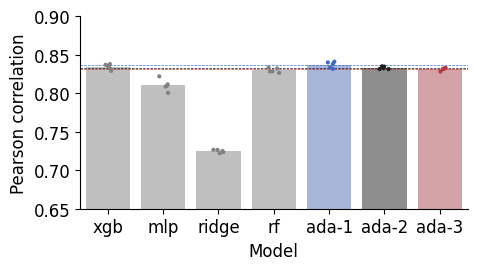

ada-1 vs xgb t-statistic: 1.0052314594317475, p-value: 0.34421829420513633
Not significant
ada-1 vs mlp t-statistic: 6.773008296992632, p-value: 0.0001416756360183802
Significant
ada-1 vs ridge t-statistic: 55.31357920420867, p-value: 1.2661383245760564e-11
Significant
ada-1 vs rf t-statistic: 3.1685908897351793, p-value: 0.013222686525951478
Significant
ada-2 vs xgb t-statistic: -0.8129567769352778, p-value: 0.43976413269009496
Not significant
ada-2 vs mlp t-statistic: 6.390088232530067, p-value: 0.0002113545188657535
Significant
ada-2 vs ridge t-statistic: 94.36905727260701, p-value: 1.7749136267191227e-13
Significant
ada-2 vs rf t-statistic: 2.145692110403574, p-value: 0.06420467585360703
Not significant
ada-3 vs xgb t-statistic: -1.68153909479947, p-value: 0.13116339287622633
Not significant
ada-3 vs mlp t-statistic: 5.924453476332983, p-value: 0.0003519250241038946
Significant
ada-3 vs ridge t-statistic: 90.46623918574798, p-value: 2.4877010096469986e-13
Significant
ada-3 vs rf t-

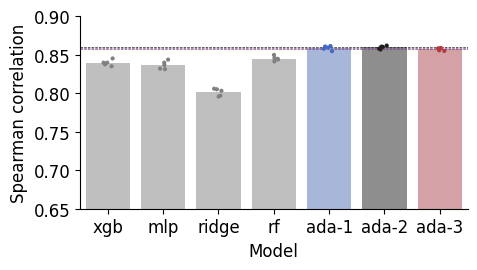

ada-1 vs xgb t-statistic: 9.363727958131928, p-value: 1.3836054345130708e-05
Significant
ada-1 vs mlp t-statistic: 8.385681188640048, p-value: 3.106702056527021e-05
Significant
ada-1 vs ridge t-statistic: 23.58507653120006, p-value: 1.111198683280531e-08
Significant
ada-1 vs rf t-statistic: 7.456166193464704, p-value: 7.222011722568536e-05
Significant
ada-2 vs xgb t-statistic: 10.452038176138814, p-value: 6.0960803710421475e-06
Significant
ada-2 vs mlp t-statistic: 9.050079648882058, p-value: 1.7790096704411755e-05
Significant
ada-2 vs ridge t-statistic: 25.12289139826626, p-value: 6.7447606210512825e-09
Significant
ada-2 vs rf t-statistic: 8.63229315227456, p-value: 2.515552743027425e-05
Significant
ada-3 vs xgb t-statistic: 9.640148797442329, p-value: 1.1151932364142598e-05
Significant
ada-3 vs mlp t-statistic: 8.327810167535374, p-value: 3.266856555396233e-05
Significant
ada-3 vs ridge t-statistic: 24.817117435554408, p-value: 7.430663622433794e-09
Significant
ada-3 vs rf t-statisti

In [2]:
import  numpy as np
import pandas as pd
from os.path import join as pjoin
from scipy.stats import ttest_ind
# plot the performance as bar plot
import matplotlib.pyplot as plt
import seaborn as sns

alpha = 0.5
f_size = 12

for name, performance in zip(['Pearson', 'Spearman'], [ensemble_adaboost_performances_pearson, ensemble_adaboost_performances_spearman]):
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_ylim(0.65, 0.9)
    colour_palette = iter(sns.color_palette('icefire', n_colors=rounds))
    colours = ['gray' if 'ada' not in model else next(colour_palette) for model in performance.keys()]
    sns.stripplot(data=performance, ax=ax, alpha=1, jitter=0.1, size=3, palette=colours)
    sns.barplot(data=performance, ax=ax, alpha=alpha, palette=colours, errorbar=None)
    ax.set_xlabel('Model', fontsize=f_size)
    ax.set_ylabel(f'{name} correlation', fontsize=f_size)
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax.tick_params(axis='both', which='minor', labelsize=f_size)
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # show a horizontal line at the mean for adaboost model
    for ind, model in enumerate(performance.keys()):
        if 'ada' in model:
            ax.axhline(y=np.mean(performance[model]), color=colours[ind], linestyle='--', linewidth=0.5)
    # rotate the x tick labels
    plt.show()
    
    # perform paired t-test between opt pwm models and the rest
    from scipy.stats import ttest_ind
    adaboost_values = {model: performance[model] for model in performance.keys() if 'ada' in model}
    rest_values = {model: performance[model] for model in performance.keys() if 'ada' not in model}

    for ensemble, performance_ensemble in zip(adaboost_values.keys(), adaboost_values.values()):
        for rest, performance_rest in zip(rest_values.keys(), rest_values.values()):
            t_stat, p_value = ttest_ind(performance_ensemble, performance_rest)
            print(f'{ensemble} vs {rest} t-statistic: {t_stat}, p-value: {p_value}')
            if p_value < 0.05:
                print('Significant')
            else:
                print('Not significant')